In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

out_place_n0 (10,)
out_place_n2 (10,)
out_place_n8 (10,)
baseline (10,)


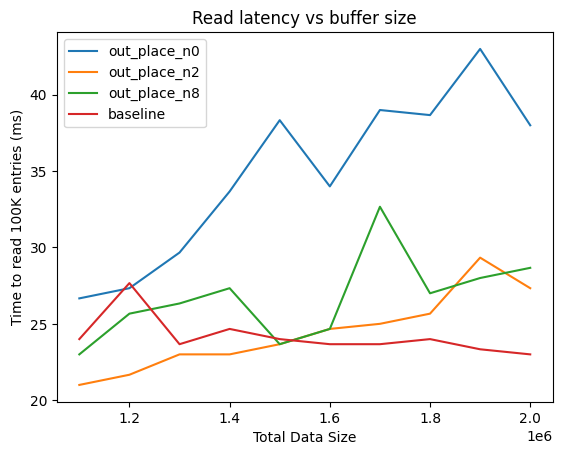

In [5]:
# Results of the inserts_vs_index_power experiment

rlatency_buf_df = pd.read_csv("inserts_vs_rlatency1.csv")

xs = list(rlatency_buf_df["data_size"].unique())
names = list(rlatency_buf_df["name"].unique())
ymap = {}
for name in names:
    ymap[name] = np.array(rlatency_buf_df[rlatency_buf_df["name"] == name].groupby("data_size").mean(numeric_only=True).sort_values(by="data_size")["time"])

for name in names:
    print(name, ymap[name].shape)
    plt.plot(xs, ymap[name], label=name)
plt.xlabel("Total Data Size")
plt.ylabel("Time to read 100K entries (ms)")
plt.title("Read latency vs buffer size")
plt.legend()
plt.show()


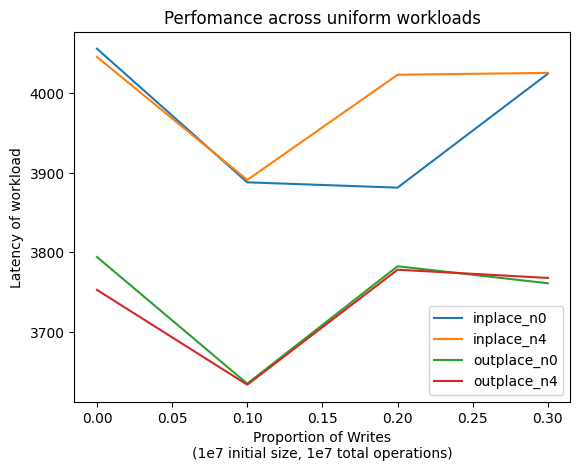

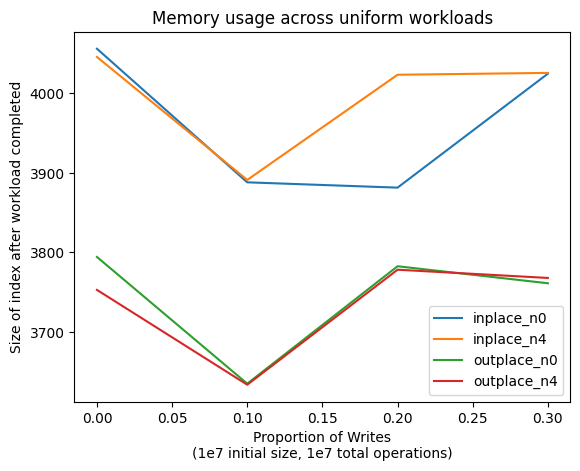

In [9]:
# Results of the workload experiment

uwork_df = pd.read_csv("workloads_uniform.csv")

xs = list(uwork_df["write_prop"].unique())
names = list(uwork_df["name"].unique())
time_map = {}
size_map = {}
for name in names:
    time_map[name] = np.array(uwork_df[uwork_df["name"] == name].groupby("write_prop").mean(numeric_only=True).sort_values(by="write_prop")["time"])
    size_map[name] = np.array(uwork_df[uwork_df["name"] == name].groupby("write_prop").mean(numeric_only=True).sort_values(by="write_prop")["size"])

for name in names:
    plt.plot(xs, time_map[name], label=name)
plt.xlabel("Proportion of Writes\n(1e7 initial size, 1e7 total operations)")
plt.ylabel("Latency of workload")
plt.title("Perfomance across uniform workloads")
plt.legend()
plt.show()

for name in names:
    plt.plot(xs, size_map[name], label=name)
plt.xlabel("Proportion of Writes\n(1e7 initial size, 1e7 total operations)")
plt.ylabel("Size of index after workload completed")
plt.title("Memory usage across uniform workloads")
plt.legend()
plt.show()
